In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

In [7]:
image = cv2.imread("scan_niv_gris_300ppp_fiche_ocr.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary, reduction=1)

In [4]:
image = cv2.imread("scan_niv_gris_300ppp_fiche_ocr.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
tresh, image_binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary, reduction=1)

In [9]:
print(image_binary)
image_binary = (gray < 250).astype(np.uint8)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


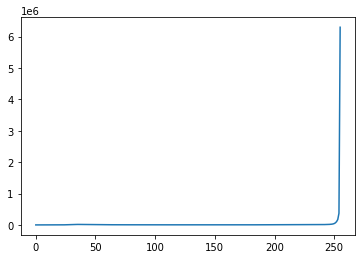

True

In [8]:
import cv2
import numpy as np

# Lire l'image
image = cv2.imread("scan_niv_gris_300ppp_fiche_ocr.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le seuillage d'Otsu pour obtenir le seuil automatique
tresh, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Analyser l'histogramme de l'image
histogram = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Afficher l'histogramme (optionnel, pour visualiser la distribution)
import matplotlib.pyplot as plt
plt.plot(histogram)
plt.show()

# Choisir un seuil plus strict basé sur l'histogramme
# Par exemple, trouver une valeur légèrement inférieure au seuil d'Otsu
manual_thresh = tresh - 10  # Ajustez selon l'histogramme

# Appliquer le seuil manuel
_, image_binary_stricter = cv2.threshold(gray, manual_thresh, 255, cv2.THRESH_BINARY)

# Enregistrer ou afficher l'image binaire stricte
cv2.imwrite('image_binaire_stricte.jpg', image_binary_stricter)
# cv2.imshow('Image Binaire Stricte', image_binary_stricter)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

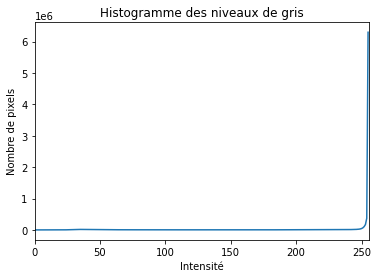

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lire l'image
image = cv2.imread("scan_niv_gris_300ppp_fiche_ocr.bmp")

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculer l'histogramme
histogram = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Afficher l'histogramme
plt.figure()
plt.title("Histogramme des niveaux de gris")
plt.xlabel("Intensité")
plt.ylabel("Nombre de pixels")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()


In [8]:
image = cv2.imread("scan_niv_gris_300ppp_fiche_ocr.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

tresh, image_binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
indices_lignes = separe_en_lignes(image_binary, reduction=1)

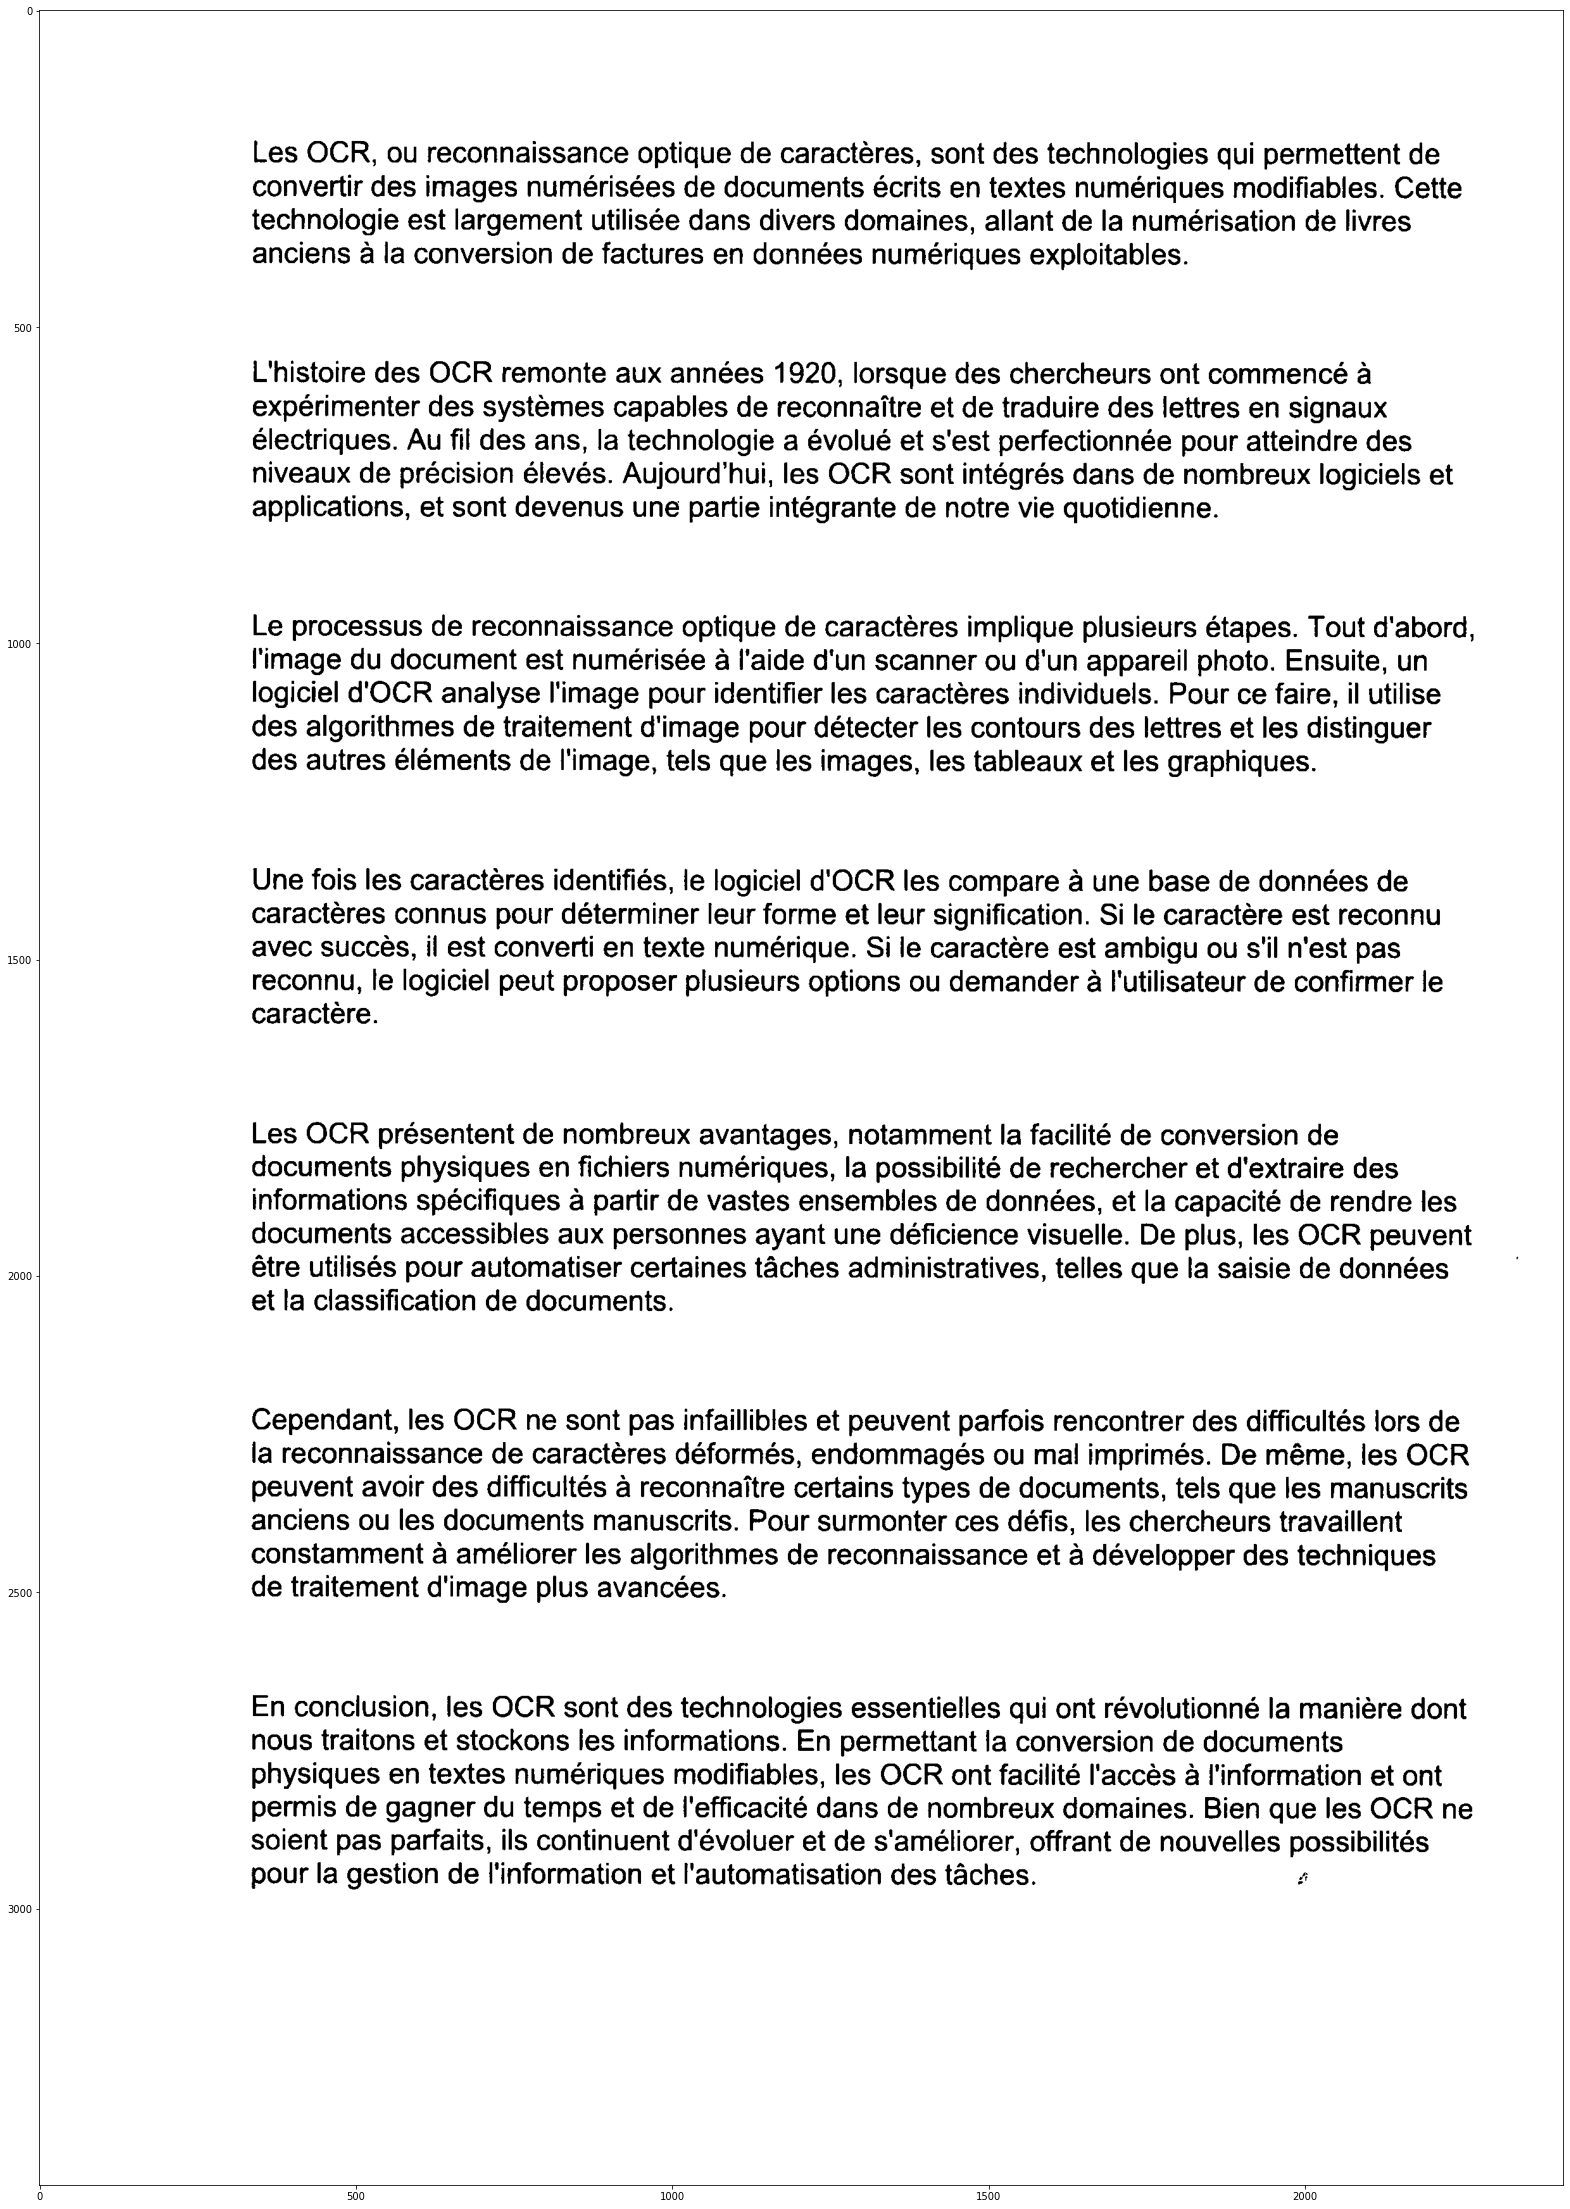

In [9]:
plt.figure(figsize=(50,40))
plt.imshow(image_binary, cmap='gray')
plt.show()

In [3]:
print(len(indices_lignes))
print(len(image), len(image[0]))

37
3437 2409


In [7]:
alphabet = list('Les OCR, ou reconnaissance optique de caractères, sont des technologies qui permettent de')
print(alphabet)

['L', 'e', 's', ' ', 'O', 'C', 'R', ',', ' ', 'o', 'u', ' ', 'r', 'e', 'c', 'o', 'n', 'n', 'a', 'i', 's', 's', 'a', 'n', 'c', 'e', ' ', 'o', 'p', 't', 'i', 'q', 'u', 'e', ' ', 'd', 'e', ' ', 'c', 'a', 'r', 'a', 'c', 't', 'è', 'r', 'e', 's', ',', ' ', 's', 'o', 'n', 't', ' ', 'd', 'e', 's', ' ', 't', 'e', 'c', 'h', 'n', 'o', 'l', 'o', 'g', 'i', 'e', 's', ' ', 'q', 'u', 'i', ' ', 'p', 'e', 'r', 'm', 'e', 't', 't', 'e', 'n', 't', ' ', 'd', 'e']


In [ ]:
a = ['L', 'e', 's', 'espace', 'O', 'C', 'R', 'virgule', 'espace', 'o', 'u', 'espace', 'r', 'e', 'c', 'o', 'n', 'n', 'a', 'i', 's', 's', 'a', 'n', 'c', 'e', 'espace', 'o', 'p', 't', 'i', 'q', 'u', 'e', 'espace', 'd', 'e', 'espace', 'c', 'a', 'r', 'a', 'c', 't', 'e_grave', 'r', 'e', 's', 'virgule', 'espace', 's', 'o', 'n', 't', 'espace', 'd', 'e', 's', 'espace', 't', 'e', 'c', 'h', 'n', 'o', 'l', 'o', 'g', 'i', 'e', 's', 'espace', 'q', 'u', 'i', 'espace', 'p', 'e', 'r', 'm', 'e', 't', 't', 'e', 'n', 't', 'espace', 'd', 'e']


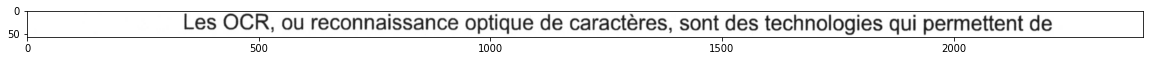

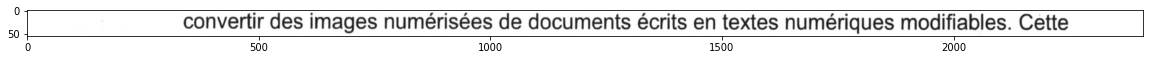

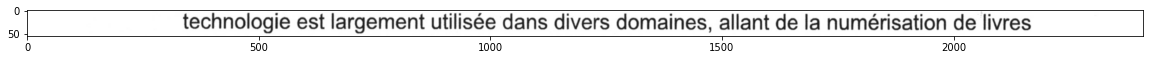

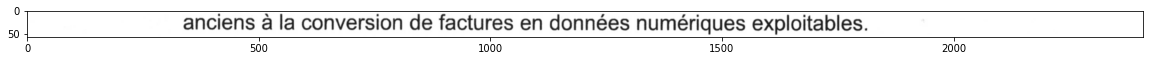

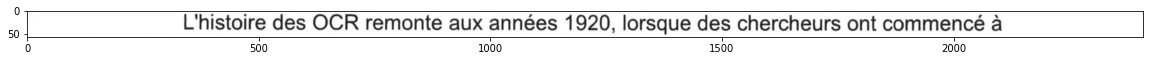

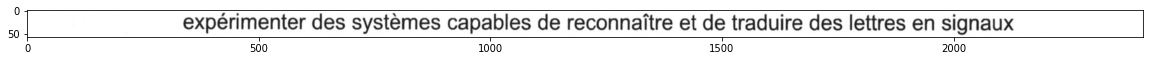

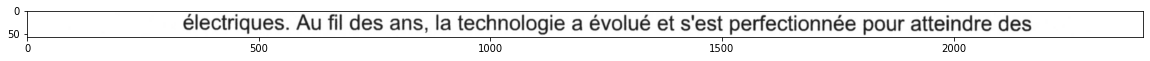

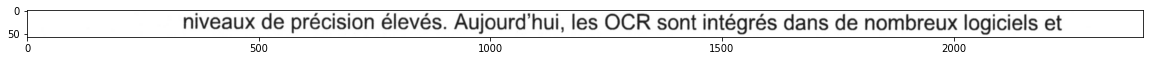

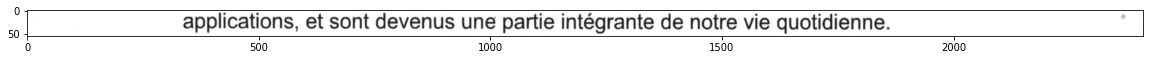

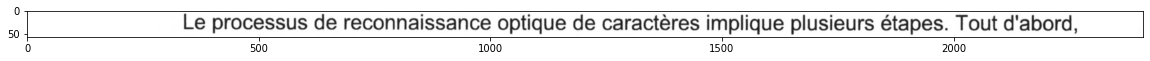

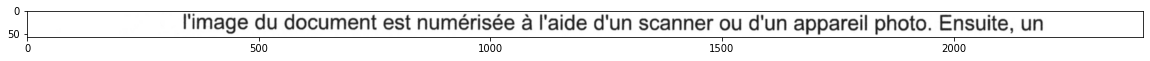

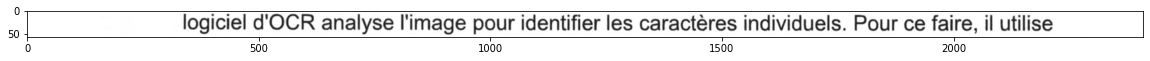

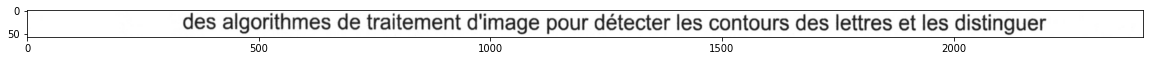

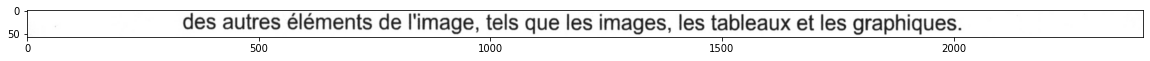

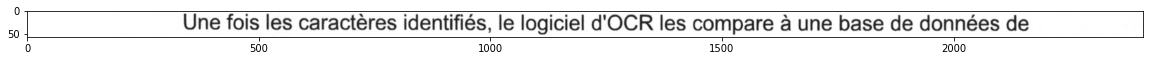

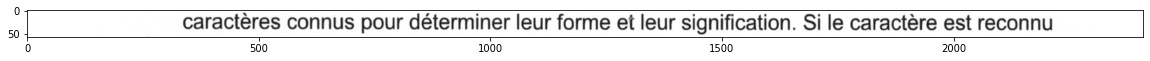

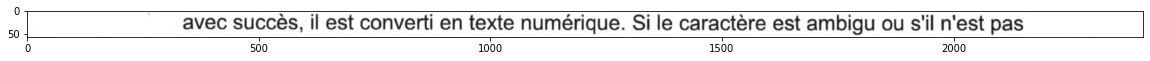

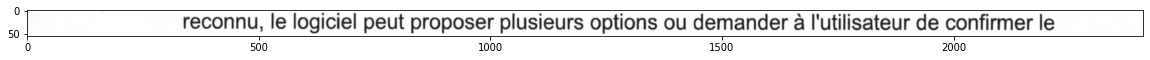

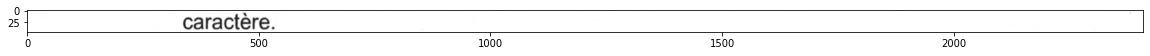

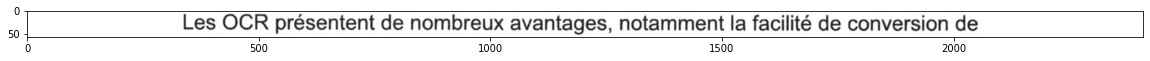

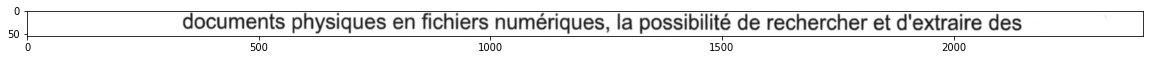

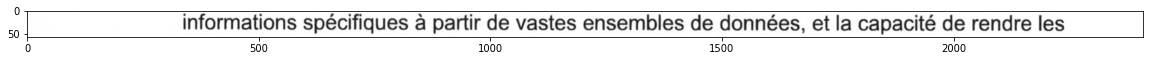

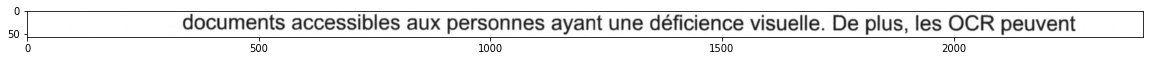

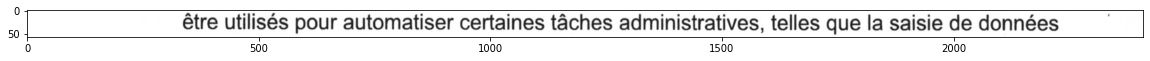

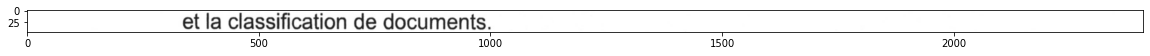

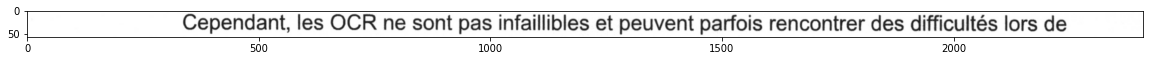

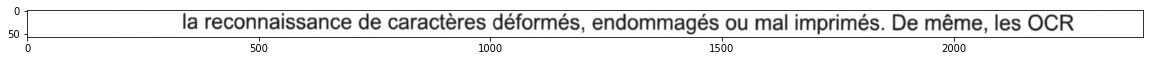

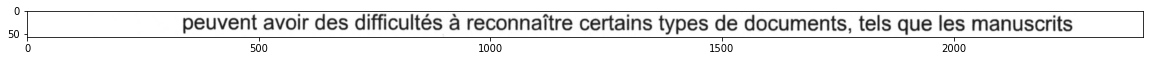

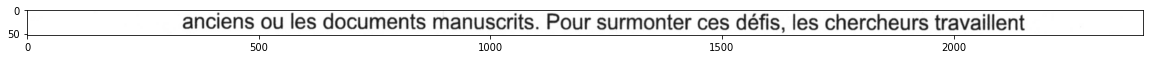

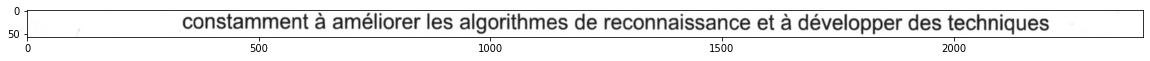

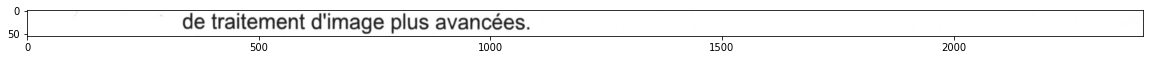

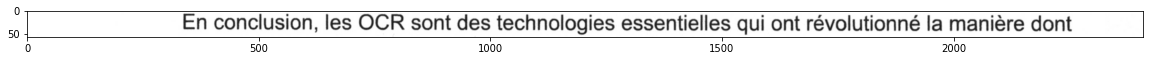

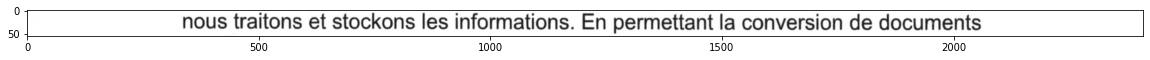

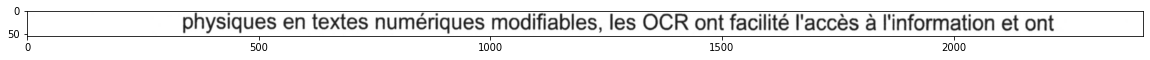

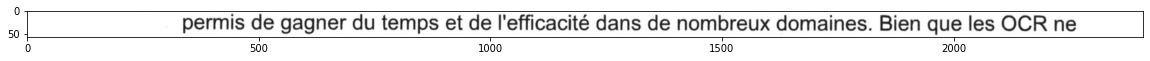

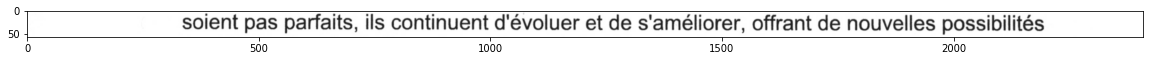

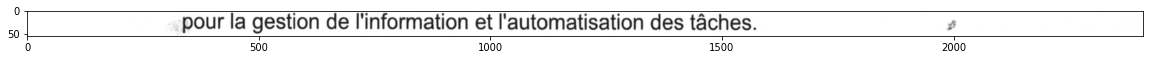

In [4]:
for t in indices_lignes :
    plt.figure(figsize=(20, 10))
    plt.imshow(image[t[0]:t[1]])
    plt.show()

In [12]:
def separe_en_caracteres_local(image_binary : np, indices_debut_fin_ligne : tuple, taux=0.001) -> list :

    # Définition de l'image binarisée de la ligne voulue
    h = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1]]

    # Création d'un dictionnaire stockant le nombre de pixels noirs par colonne
    dictionnaire = {}
    for k in range(len(h[0])) :
        dictionnaire[k] = 0

    for i in range(len(h)) :
        for j in range(len(h[i])) :
            if h[i][j] == 0 :
                dictionnaire[j] += 1
    # On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne
    for num_colonne in dictionnaire.keys() :
        dictionnaire[num_colonne] /= len(h)

    # On conserve dans une liste ceux qui ont un taux >= 0.001
    indices = []
    for elt in dictionnaire.keys() :
        if dictionnaire[elt] >= taux :
            indices.append(elt)


    # Obtenir des plages continues de pixels représentant les caractères en rajoutant un peu d'espace entre les caractères pour ne pas qu'ils soient sérrés dans leurs cases
    d = np.diff(indices)
    espaces =[int(val/2) for val in d if val > 1]

    
    ranges = []
    start = indices[0]
    indices_espaces = 0
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            if indices_espaces >= 1 :
                val_avant = espaces[indices_espaces-1] 
            else :
                val_avant = espaces[indices_espaces]
            val_apres = espaces[indices_espaces]
            ranges.append((start-val_avant, indices[i - 1]+val_apres))
            start = indices[i]
            indices_espaces += 1
    ranges.append((start-val_avant, indices[-1]+val_avant))

    return indices, d, espaces, ranges


In [5]:
def separe_en_caracteres_local_2(image_binary: np.ndarray, indices_debut_fin_ligne: tuple, taux=0.001, seuil_espace_mot=15) -> list:
    """
    Description : Prend en entrée une ligne de texte dans une image et renvoie les indices de colonnes de début et de fin de chaque caractère,
                  incluant les espaces entre les mots sous forme de tuples d'indices.

    Exemple : >>> ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)
                  ranges = [ (0, 21), (25, 65), (66, 79), (80, 85), ...]

    Inputs : - image_binary (np.ndarray) : la version binarisée de l'image dont on veut extraire les caractères
             - indices_debut_fin_ligne (tuple) : les indices de début et de fin de la ligne dont on veut extraire les caractères
             - taux (float) : fixé de base à 0.001, permet de séparer les colonnes de pixels contenant de l'information ou non
             - seuil_espace_mot (int) : le seuil pour détecter les espaces entre les mots

    Output : (ranges) list : une liste de tuples des indices de colonnes de début et de fin de chaque caractère et espaces pour la ligne entrée
    """
   
    # Définition de l'image binarisée de la ligne voulue
    h = image_binary[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1]]

    # Création d'un dictionnaire stockant le nombre de pixels noirs par colonne
    dictionnaire = {}
    for k in range(len(h[0])):
        dictionnaire[k] = 0

    for i in range(len(h)):
        for j in range(len(h[i])):
            if h[i][j] == 0:
                dictionnaire[j] += 1
    # On divise par le nombre de pixels pour avoir le taux de pixels noirs dans la colonne
    for num_colonne in dictionnaire.keys():
        dictionnaire[num_colonne] /= len(h)

    # On conserve dans une liste ceux qui ont un taux >= 0.001
    indices = []
    for elt in dictionnaire.keys():
        if dictionnaire[elt] >= taux:
            indices.append(elt)

    # Obtenir des plages continues de pixels représentant les caractères et les espaces
    ranges = []
    start = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i - 1] + 1:
            # Ajouter la plage de colonnes pour un caractère
            ranges.append((start, indices[i - 1]))
            # Si l'écart entre deux indices est grand, ajouter un espace pour les mots sous forme de tuple d'indices
            if indices[i] - indices[i - 1] > seuil_espace_mot:  # Utiliser le seuil pour détecter les espaces entre mots
                ranges.append((indices[i - 1] + 1, indices[i] - 1))  # Ajouter les indices de colonnes vides
            start = indices[i]
    ranges.append((start, indices[-1]))

    return ranges

In [4]:
indices_debut_fin_ligne = indices_lignes[0]

v = separe_en_caracteres(image_binary, indices_debut_fin_ligne)
print(v)

[(340, 359), (363, 384), (389, 407), (408, 423), (424, 455), (460, 488), (494, 522), (527, 531), (532, 550), (551, 572), (577, 595), (596, 613), (614, 627), (629, 650), (654, 674), (677, 699), (703, 723), (729, 748), (754, 774), (780, 784), (789, 808), (812, 831), (835, 855), (861, 880), (886, 906), (909, 930), (931, 946), (947, 968), (973, 993), (996, 1007), (1011, 1014), (1020, 1040), (1046, 1065), (1071, 1092), (1093, 1107), (1108, 1128), (1134, 1155), (1156, 1171), (1172, 1192), (1195, 1215), (1221, 1233), (1235, 1255), (1260, 1280), (1282, 1293), (1296, 1317), (1322, 1334), (1336, 1358), (1361, 1380), (1386, 1391), (1392, 1409), (1410, 1428), (1432, 1453), (1458, 1477), (1482, 1492), (1493, 1507), (1508, 1528), (1533, 1554), (1559, 1577), (1578, 1592), (1593, 1604), (1607, 1628), (1632, 1652), (1656, 1674), (1681, 1699), (1705, 1726), (1731, 1735), (1740, 1762), (1766, 1786), (1792, 1796), (1801, 1822), (1827, 1846), (1847, 1861), (1862, 1881), (1887, 1907), (1913, 1917), (1918, 1

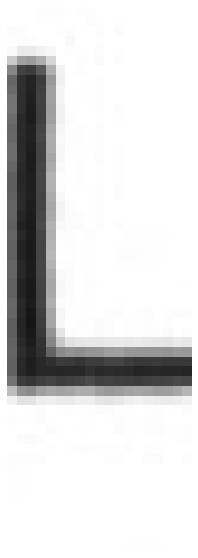

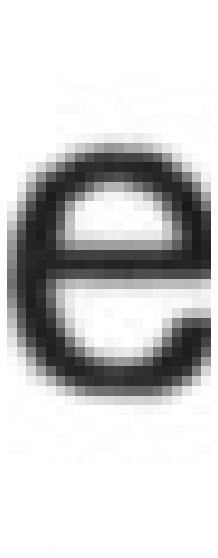

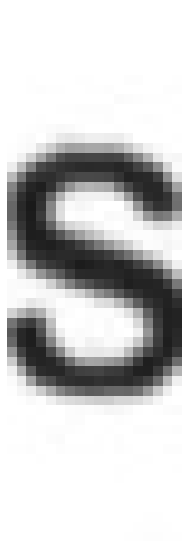

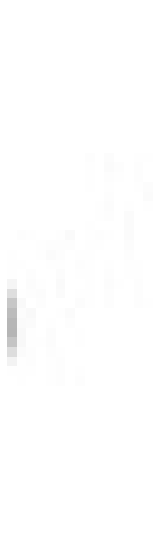

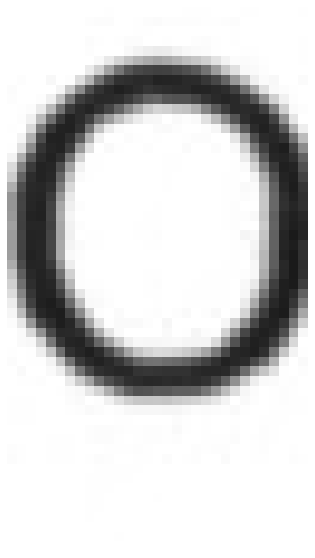

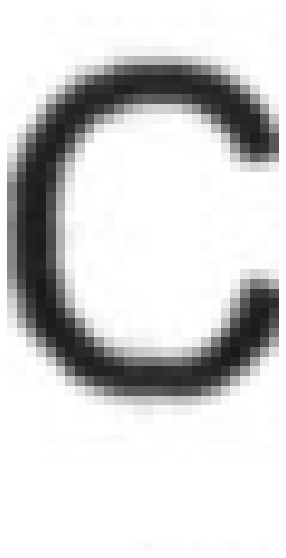

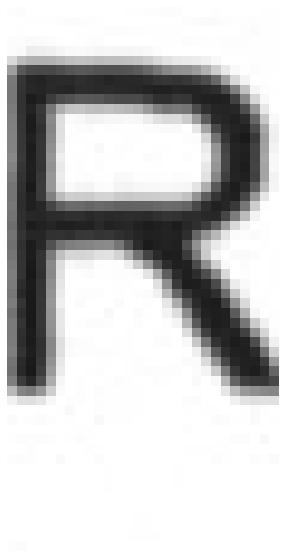

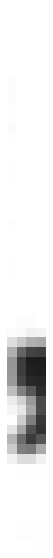

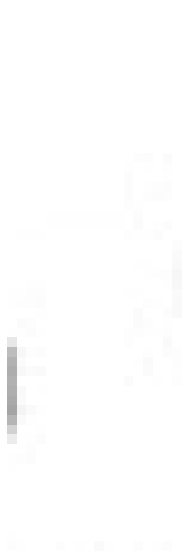

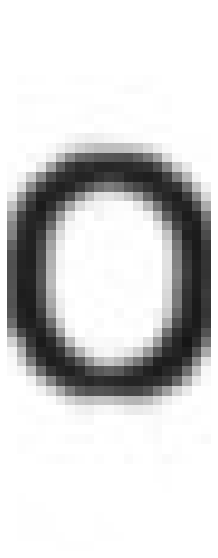

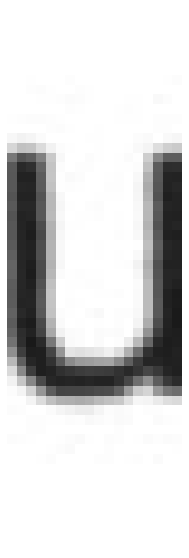

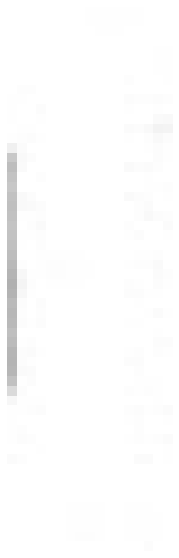

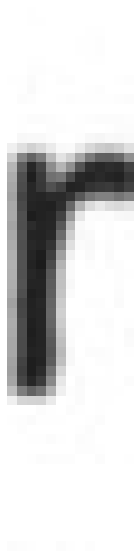

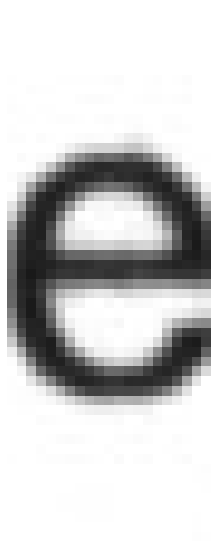

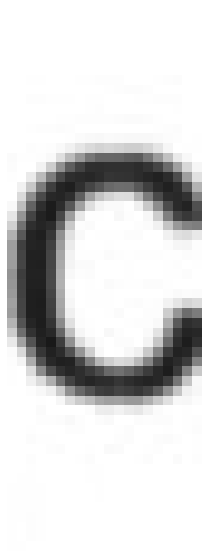

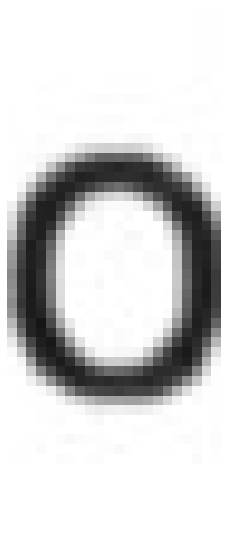

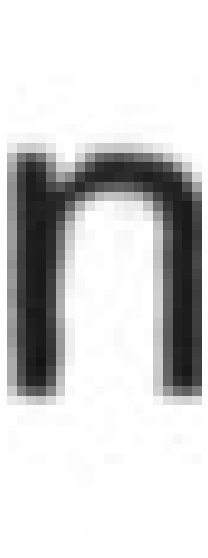

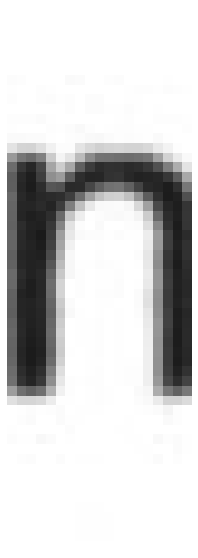

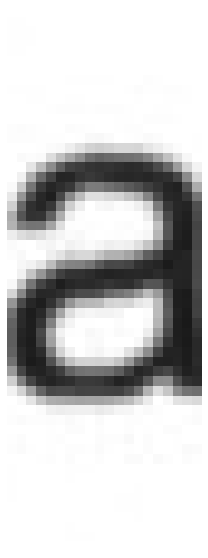

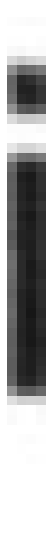

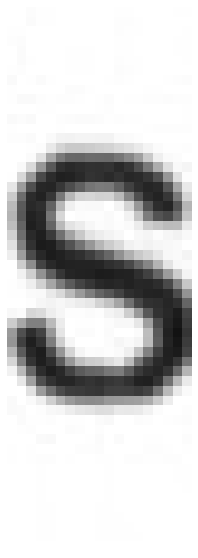

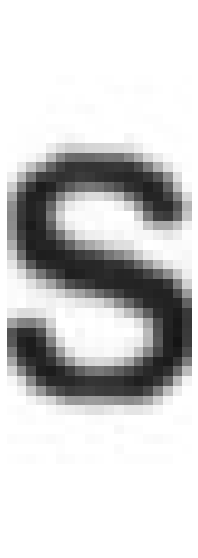

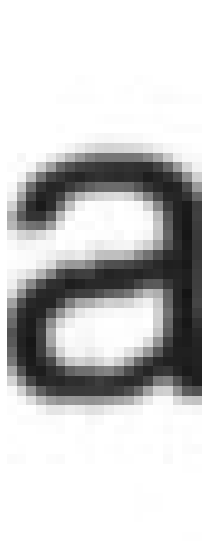

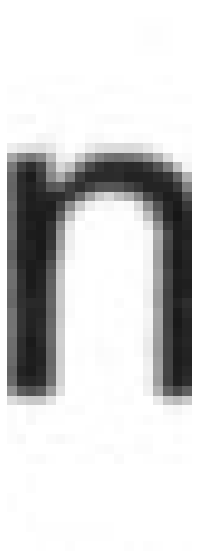

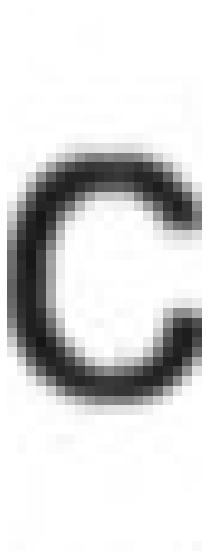

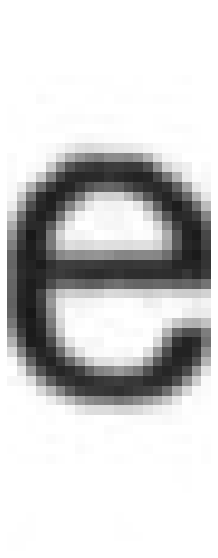

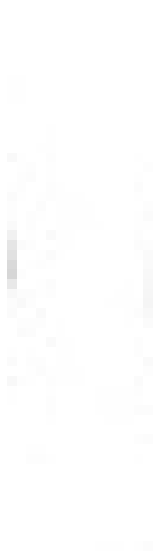

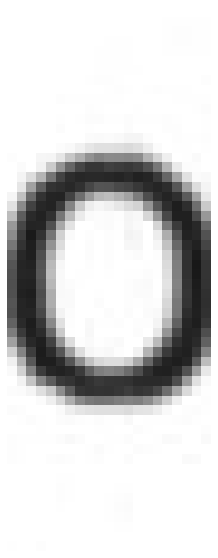

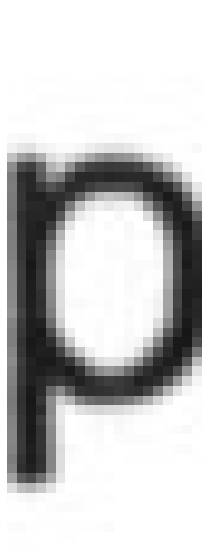

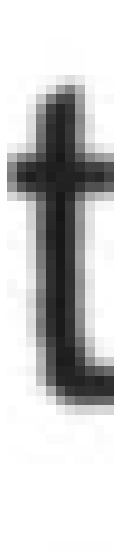

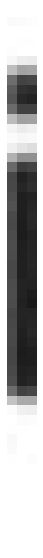

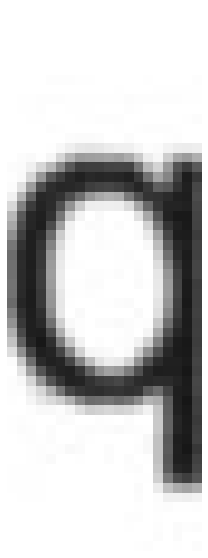

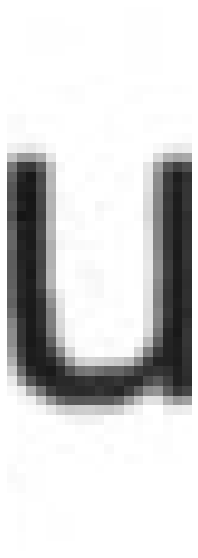

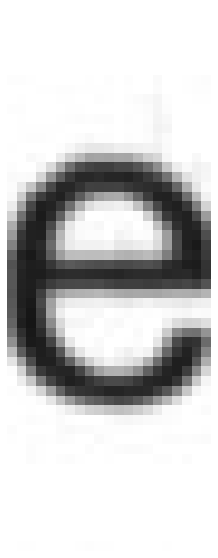

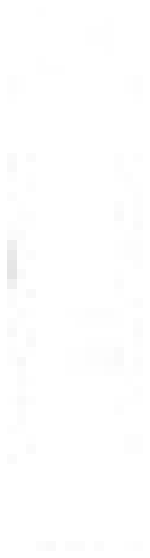

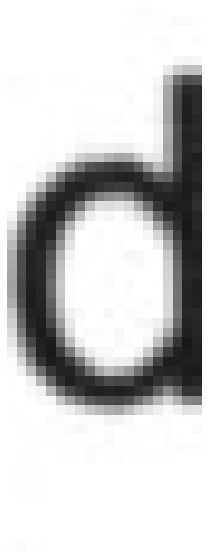

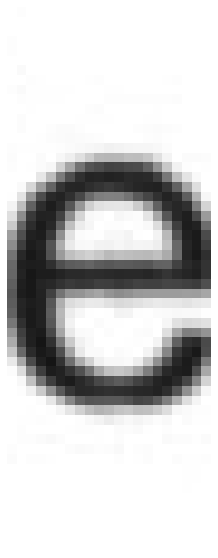

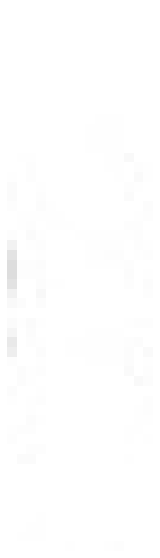

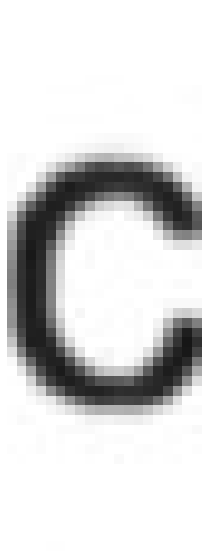

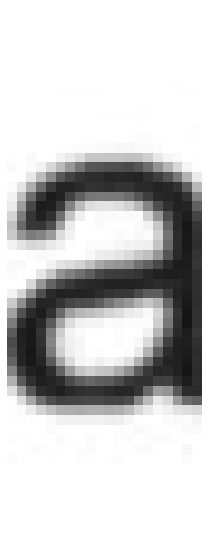

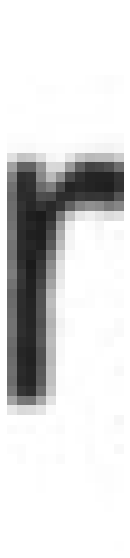

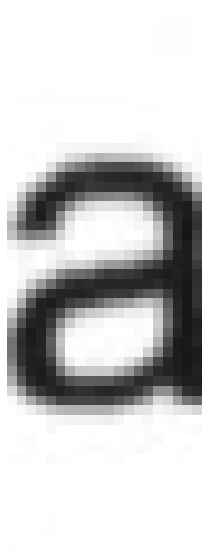

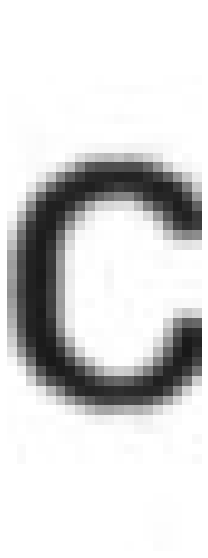

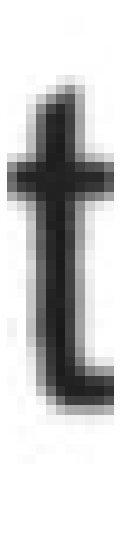

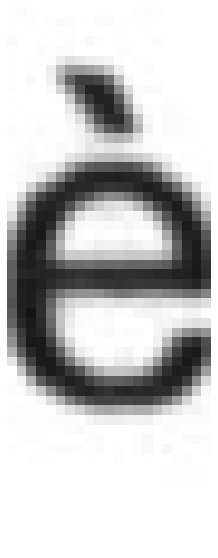

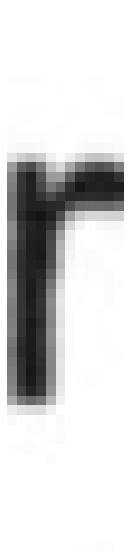

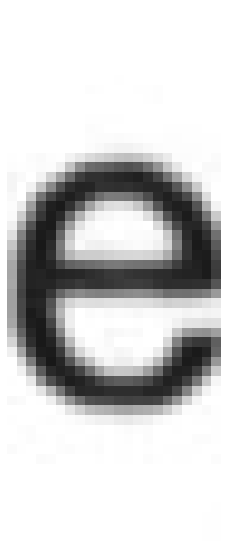

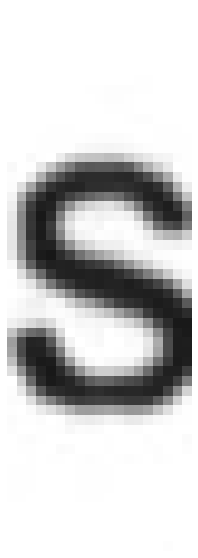

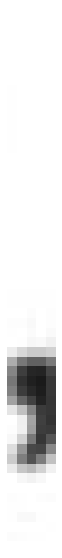

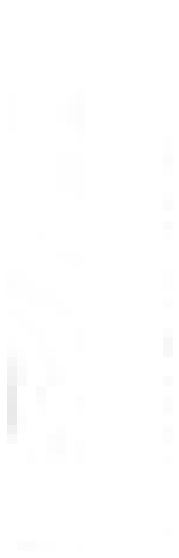

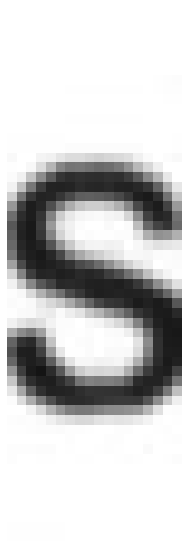

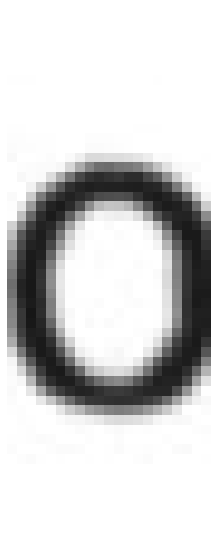

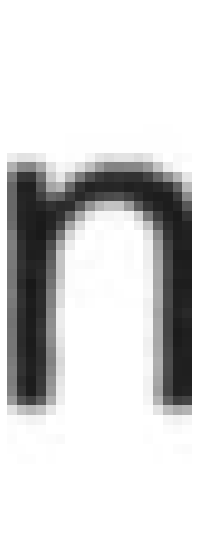

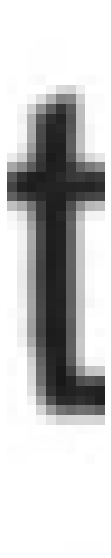

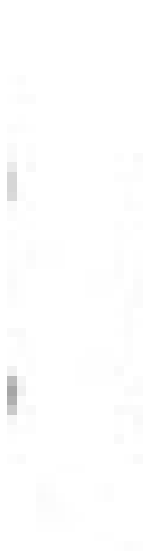

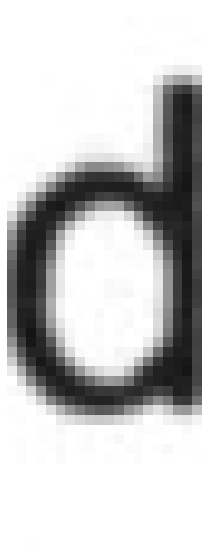

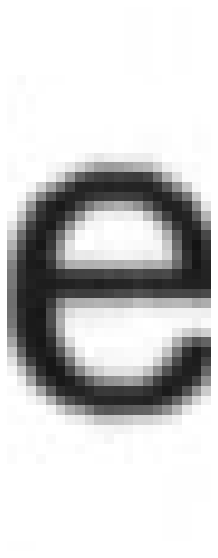

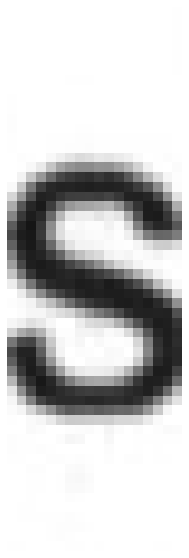

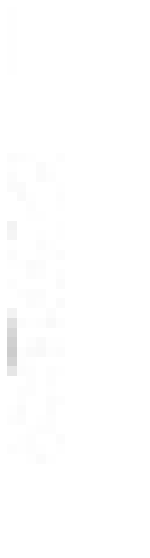

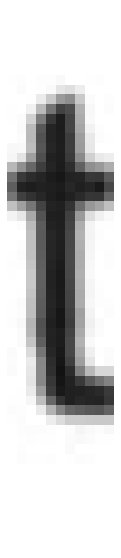

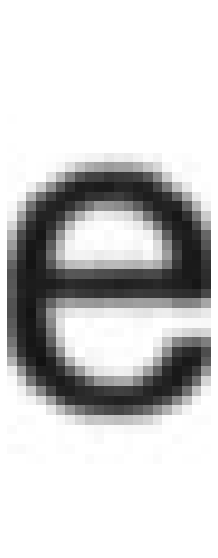

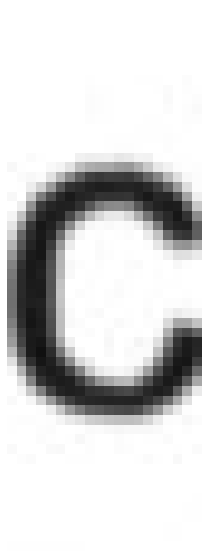

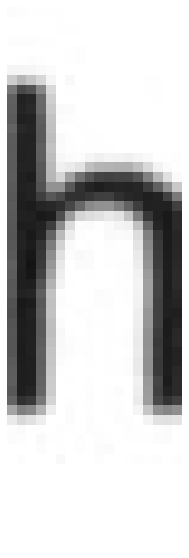

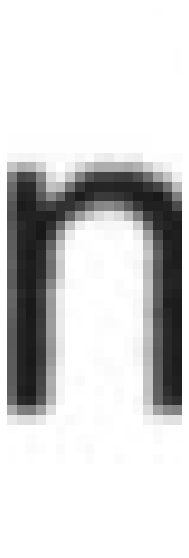

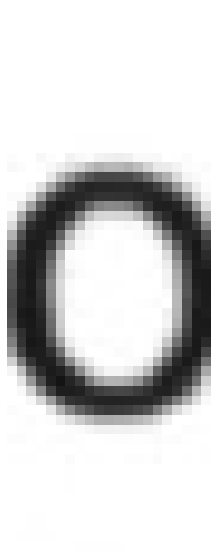

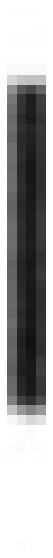

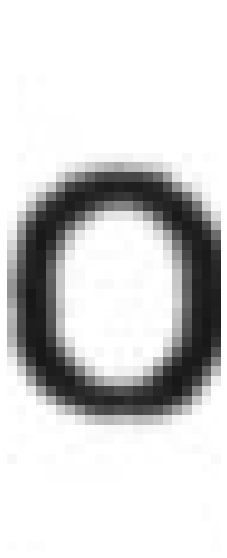

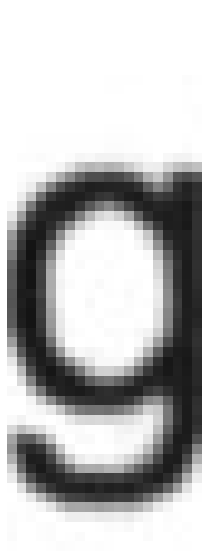

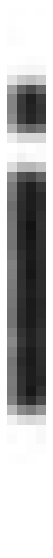

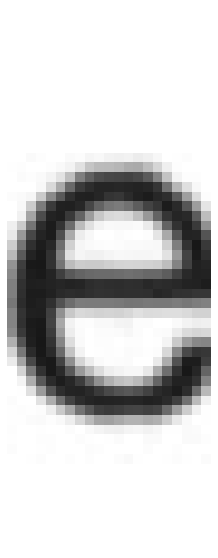

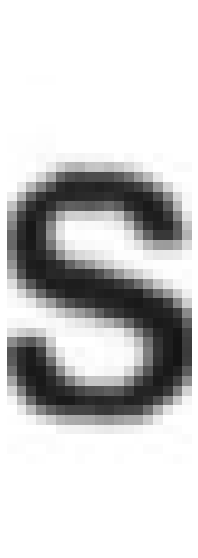

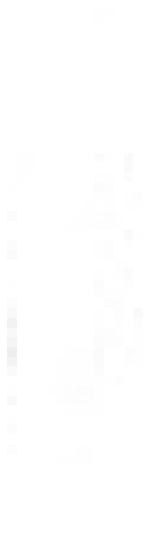

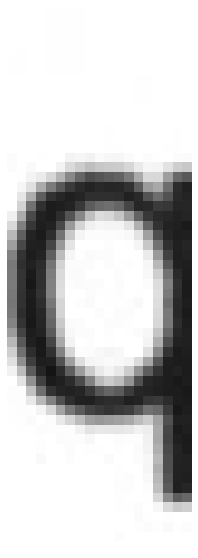

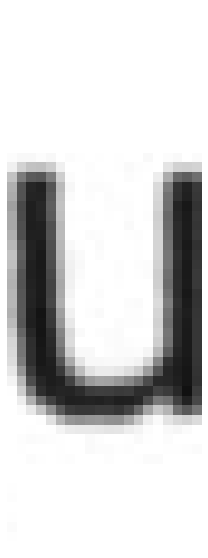

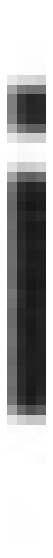

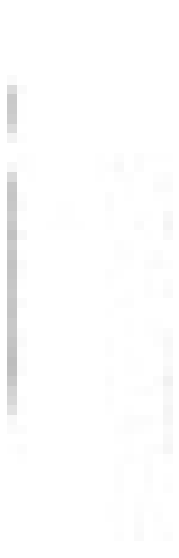

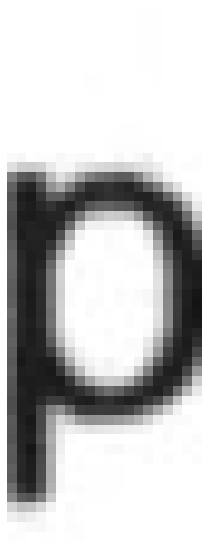

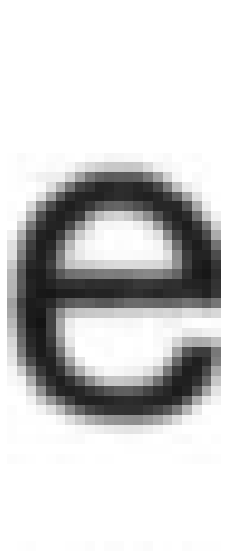

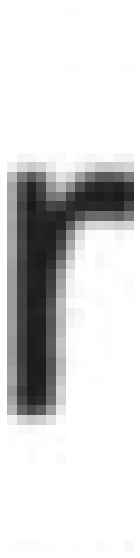

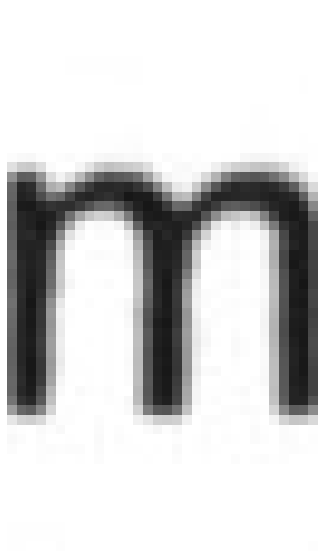

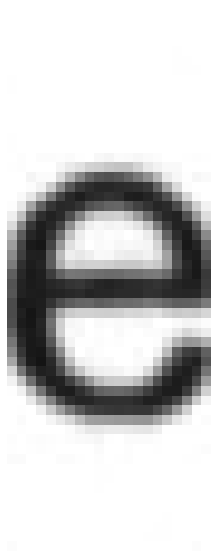

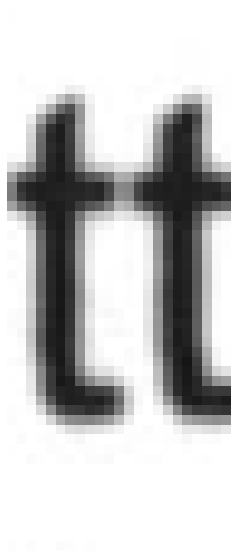

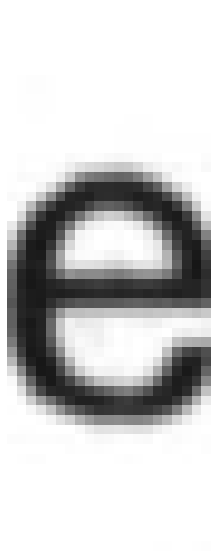

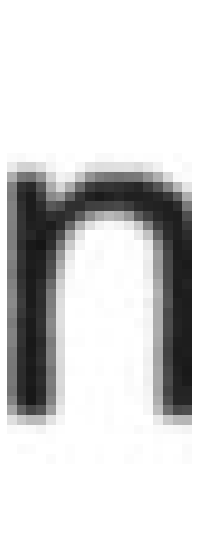

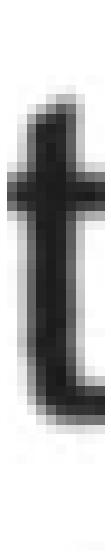

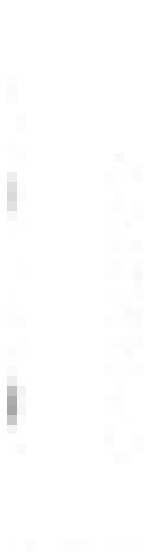

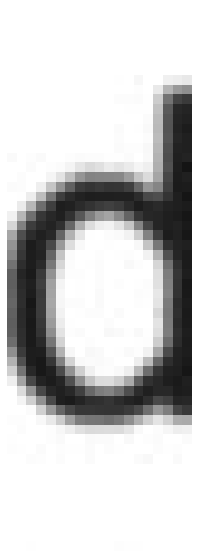

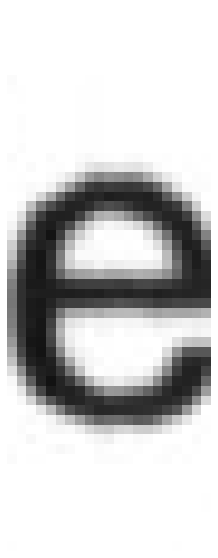

In [5]:
for elt in v :
    plt.figure(figsize=(20,10))
    plt.imshow(image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]])
    plt.axis('off')
    plt.show()

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from separation_en_caractères import separe_en_caracteres
from separation_en_lignes import separe_en_lignes

# Liste des lettres de l'alphabet
alphabet = []

image = cv2.imread("scan_niv_gris_300ppp_fiche_ocr.bmp")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

indices_lignes = separe_en_lignes(image_binary)

a = ['L', 'e', 's', 'espace', 'O', 'C', 'R', 'virgule', 'espace', 'o', 'u', 'espace', 'r', 'e', 'c', 'o', 'n', 'n', 'a', 'i', 's', 's', 'a', 'n', 'c', 'e', 'espace', 'o', 'p', 't', 'i', 'q', 'u', 'e', 'espace', 'd', 'e', 'espace', 'c', 'a', 'r', 'a', 'c', 't', 'e_grave', 'r', 'e', 's', 'virgule', 'espace', 's', 'o', 'n', 't', 'espace', 'd', 'e', 's', 'espace', 't', 'e', 'c', 'h', 'n', 'o', 'l', 'o', 'g', 'i', 'e', 's', 'espace', 'q', 'u', 'i', 'espace', 'p', 'e', 'r', 'm', 'e', 'tt', 'e', 'n', 't', 'espace', 'd', 'e']

indices_debut_fin_ligne = indices_lignes[0]
ranges = separe_en_caracteres(image_binary, indices_debut_fin_ligne)

output_dir = f'Pour_clement_ligne_1'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Enregistrer chaque caractère
i = 0
for elt in ranges:
    # Extraire le caractère de l'image binaire
    caractere = image[indices_debut_fin_ligne[0]:indices_debut_fin_ligne[1], elt[0]:elt[1]]
    # Créer une figure de la taille exacte du caractère
    plt.figure(figsize=(caractere.shape[1] / 100, caractere.shape[0] / 100))
    plt.imshow(caractere, cmap='gray')
    plt.axis('off')  # Supprimer les axes
    filename = os.path.join(output_dir, f'{a[i]}.png')
    i += 1
    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=100)
    plt.close()


In [7]:
print(len(a))
print(len(ranges))

88
88
